# Functional Programming for Data Science
---
**Neal Ó Riain**

PyData Dublin, 10$^\mathsf{th}$ November 2018

# ``` $ whoami```
---

<img src="img/me.jpg" width="35%" align="right"> 
 
 * Former Astrophysicist (🔭, 🚀, 🌝)
 
 
<br> 
 
 
 * Current Data Scientist at Amazon.
 
 
 <br> 
 
 
 * ((Semi-) Pragmatic) Functional Programmer.

# Outline

* What is FP and why would I use it?
 
 
<br> 
 
* Some FP primitives in Python

<br> 
 
* Example



<center>
<H1> What is Functional Programming? <H1>
</center>

<center>
<H1> What is a <em>Function</em>? <H1>
</center>

```C
#include <stdio.h>

main()
{
        printf("hello, world\n");
}
```

<center>
<H1>Structured Programming<H1>
</center>

# Structured Data

![combine](img/data-structures.png)

# Structured Code

```python
def problem():
    s1 = sub_problem1()
    s2 = sub_problem2()
    return s1 + s2

def sub_problem1():
    
def sub_problem2():
    
def sub_sub_problem1():
```

<center>
<H1>Modularity!<H1>
<img src="img/lego.gif" height="500px" width="500px">
</center>


<center>
<H1>Modularity!</H1>
</center>

<center>
Re-usable
</center>

<center>
Easier to code
</center>

<center>
Debug-able
</center>

```python
def problem():
    s1 = sub_problem1()
    s2 = sub_problem2()
    return s1 + s2

def sub_problem1():
    
def sub_problem2():
    
def sub_sub_problem1():
```

<center>
<img src="img/glue.jpg" width="500px">
</center>

<center>
<h1>
Flexibility > Complexity 
</h1>
</center>

# Glue

* Purity

<br>

* Static Analysis

<br>

* Laziness

<br>

* Higher Order Functions


<center>
<h2>FP in Python</h2>
</center>

<center>
<h2>Purity</h2>
</center>

In [1]:
flag = True

def not_pure(x):
    if flag:
        return x / 10
    return x * 10

In [2]:
def not_pure_either(x):
    with open('test.txt') as f:
        print(x, f.read())

In [3]:
data = [1, 2, 3, 4]
n = 5

def scale(lst):
    for i in range(len(lst)):
        lst[i] = lst[i] * n
    return lst

result = scale(data)

In [4]:
print(data)
print(result)

[5, 10, 15, 20]
[5, 10, 15, 20]


In [5]:
data = [1, 2, 3, 4]

def scale(lst, n=5):
    return [n * v for v in lst]

result = scale(data)
print(data)
print(result)

[1, 2, 3, 4]
[5, 10, 15, 20]


<center>
<H1>Static Analysis</H1>
</center>

In [6]:
data = [1, 2, 3, 4]

def scale(lst, n=5):
    return [n * v for v in lst]

result = scale(data)
print(data)
print(result)

[1, 2, 3, 4]
[5, 10, 15, 20]


In [7]:
scale(['1', '2', '3', '4'])

['11111', '22222', '33333', '44444']

In [8]:
from typing import List

Vector = List[int]

def scale(lst: Vector, s: int=5) -> Vector:
    return [s * v for v in lst]


In [9]:
scale(['1', '2', '3', '4'])

['11111', '22222', '33333', '44444']

![mypy](img/mypy_out.png)

<center>
<h2>Laziness</h2>
</center>

```python
for char in 'python':
    
for value in [1, 2, 3, 4]:

for key in {'A': 1, 'B': 2}:
```


<center>
$$g(\,f(x))$$
</center>

In [10]:
def numbers(x: int=0) -> int:
    while True:
        yield x
        x += 1
        
n = numbers()

print(next(n))
print(next(n))
print(next(n))
print(next(n))

0
1
2
3


In [11]:
from itertools import takewhile

def predicate(x: int) -> bool:
    p = x**2 + 10 * x + 50
    return p < 1000

odd_nums = (x for x in numbers() if x % 2)
nums_lt = takewhile(predicate, odd_nums)
sum(nums_lt)

169

<center>
    <H1> Higher Order Functions</H1>
</center>

In [12]:
names = ['alice', 'bob', 'eve'] 

capitalised = []
for name in names:
    capitalised.append(str.capitalize(name))

print(capitalised)

['Alice', 'Bob', 'Eve']


```python
data = [values] 

output = []
for value in data:
        output.append(function(value))
```

<pre>loop_and_append(function, data)</pre>

In [13]:

list(map(str.capitalize, ['alice', 'bob', 'eve']))


['Alice', 'Bob', 'Eve']

# Filter

<br>

```python
data = [values] 

output = []
for value in data:
    if predicate(value):
        output.append(value)
```

In [14]:

list(filter(lambda x: x > 10, [2, 57, 41, 5, 92, 84, 2.3]))

[57, 41, 92, 84]

# Reduce


<center>
$g(f,\; [x_1, x_2, x_3],\;i) \rightarrow f(i,\;f(x_1,\;f(x_2,\;x_3)))$
</center>

In [15]:
from functools import reduce
from operator import add

reduce(add, [1, 2, 3, 4], 0) #sum

10

In [16]:
from functools import reduce
from operator import mul

reduce(mul, [1, 2, 3, 4], 1) #factorial

24

In [17]:
from functools import reduce
from operator import mul, add

reduce(add, map(mul, [1, 2, 3, 4], [2, 3, 4, 5])) #dot product

40

# Currying

<center>
$f(x, y, z) \rightarrow f(x)(y)(z)$
</center>

In [18]:
from toolz import curry

def add_and_scale(x: int, y: int, z: int) -> int:
    return (x + y) * z

add_and_scale = curry(add_and_scale)

add_and_scale(10)(20)(2)

60

# Composition

<center>
$g(f(x)) \rightarrow (g\cdot f)(x)$
</center>

In [19]:
from toolz import compose

def add(x: int, y: int) -> int:
    return x + y

def mul(x: int, y: int) -> int:
    return x * y

mul2 = curry(mul)(2)

add_and_mul2 = compose(mul2, add)

add_and_mul2(10, 20)

60

<center>
<H1>Example I: SGD</H1>
</center>

In [36]:
import toolz as tz
from numpy import random as rd
import itertools
from operator import sub
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 6]
rd.seed(123)

In [37]:
def model(theta, x):
    """
    apply linear model
    """
    m, c = theta
    return m * x + c


def get_data(n):
    """
    return n draws from a linear function
    """
    m, c = 2.4, 5.9
    x = [rd.random() * 10 for i in range(n)]
    return x, list(map(lambda xi: model((m, c), xi) + rd.normal(), x))

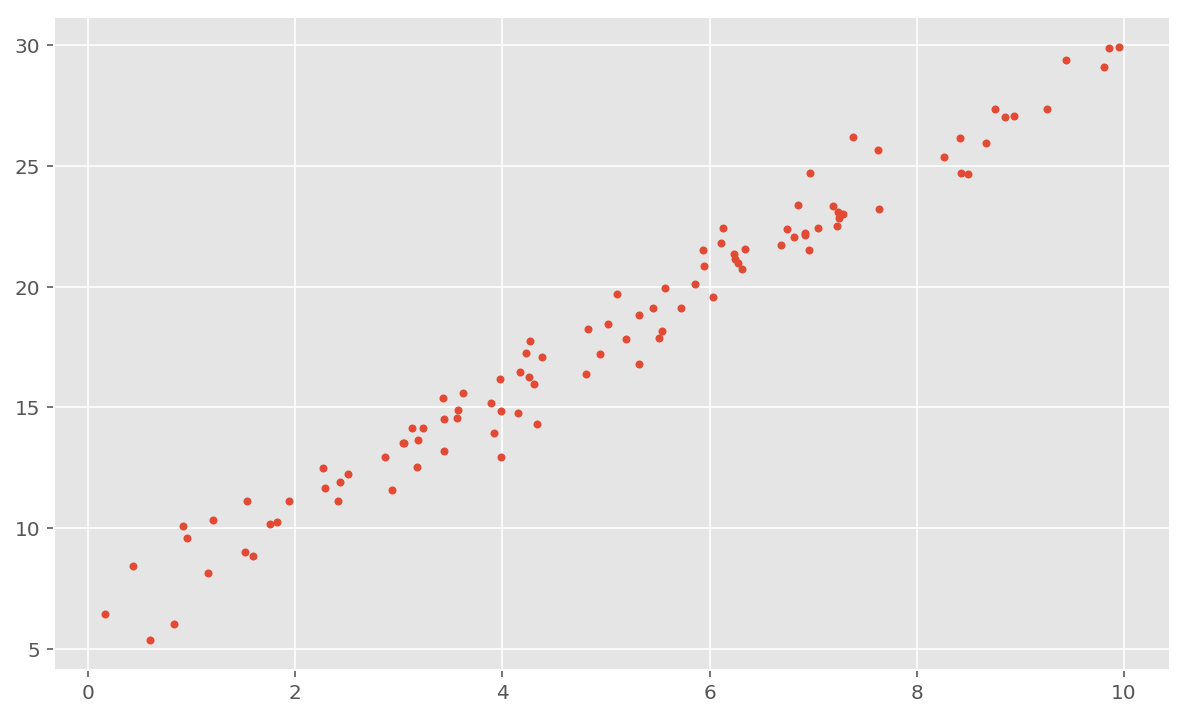

In [38]:
x, y = get_data(100)
plt.plot(x, y, '.')

In [39]:
def err(theta, x, y):
    return y - model(theta, x)


def grad(theta, x, y):
    """
    compute the gradient of the loss function
    over all data
    """
    N = len(x)
    e = [err(theta, xi, yi) for xi, yi in zip(x, y)]
    c_g = sum(-2 / N * ei for ei in e)
    m_g = sum(-2 / N * ei * xi for ei, xi in zip(e, x))

    return [m_g, c_g]

In [40]:
def sgd_step(x, y, theta):
    """
    take a single gradient step
    """
    lr = 0.001
    m, c = theta
    m_g, c_g = grad(theta, x, y)
    m_ = m - lr * m_g
    c_ = c - lr * c_g
    return [m_, c_]

In [41]:
def until_convergence(it, eq=lambda x: x[0] != x[1]):
    """
    takes a (potentially infinite) iterator and returns the
    first value at which it repeats itself.
    zips the iterator to its own tail and the moves through it
    looking for equal pairs
    """
    it2 = tz.drop(1, it)
    pairs = zip(it, it2)
    return tz.first(itertools.dropwhile(eq, pairs))[0]

In [42]:
def sgd(theta, x, y):
    """
    continue taking grad steps until conevrgence, ie. until grad == 0
    """
    step = tz.curry(sgd_step)(x)(y)
    converge = lambda x: abs(sum(map(sub, x[0], x[1]))) > 1e-5
    return until_convergence(tz.iterate(step, theta), converge)

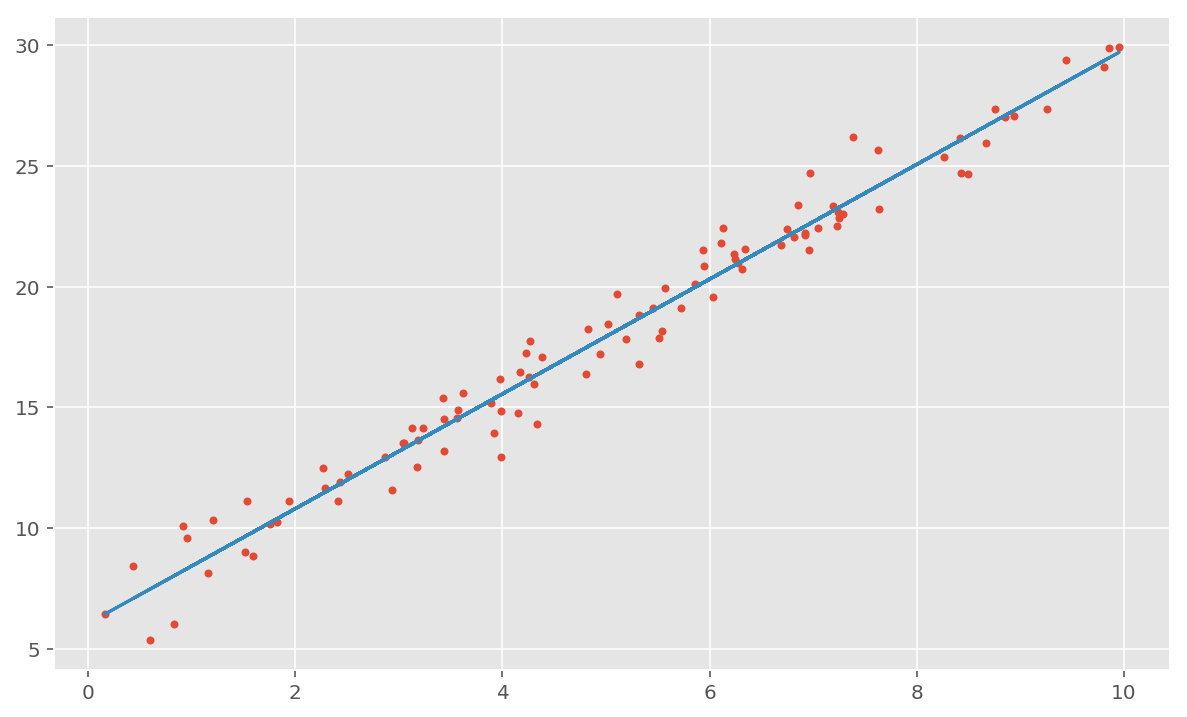

In [43]:
m, c = sgd((1, 1), x, y)
plt.plot(x, y, '.')
plt.plot(x, [m*xi + c for xi in x])

<center>
<H1>Example II</H1>
</center>

In [28]:
from glob import glob
import random 

In [29]:
random.sample(glob('lyrics/billboard/*'), 20)

['lyrics/billboard/love_takes_time.txt',
 'lyrics/billboard/patience.txt',
 'lyrics/billboard/cars.txt',
 'lyrics/billboard/when_a_man_loves_a_woman.txt',
 'lyrics/billboard/how_can_i_fall.txt',
 'lyrics/billboard/dont_forget_about_us.txt',
 'lyrics/billboard/heartbeat_song.txt',
 'lyrics/billboard/if.txt',
 'lyrics/billboard/im_your_baby_tonight.txt',
 'lyrics/billboard/love_never_felt_so_good.txt',
 'lyrics/billboard/shake_shake_shake_shake_your_booty.txt',
 'lyrics/billboard/youre_makin_me_high__let_it_flow.txt',
 'lyrics/billboard/we_will_rock_youwe_are_the_champions.txt',
 'lyrics/billboard/cherchez_la_femme.txt',
 'lyrics/billboard/judy_in_disguise_with_glasses.txt',
 'lyrics/billboard/hotel_california.txt',
 'lyrics/billboard/whatcha_say.txt',
 'lyrics/billboard/green_river.txt',
 'lyrics/billboard/jojo.txt',
 'lyrics/billboard/breakout.txt']

In [30]:
from string import punctuation
from collections import defaultdict
punc = str.maketrans({p:None for p in punctuation})

In [31]:
def wordcount_imp(directory):

    d = defaultdict(int)
    for f in glob(directory):
        for line in open(f, 'r'):
            line = line.split()
            line = [w.lower().translate(punc) for w in line]
            for s in line:
                d[s] += 1

    return {k:d[k] for k in d.keys() if len(k) >= 4}
    
words = wordcount_imp('lyrics/billboard/*')
sorted(words.items(), key=lambda x: x[1], reverse=True)[:10]

[('that', 14231),
 ('your', 13709),
 ('love', 13204),
 ('dont', 10315),
 ('know', 9993),
 ('like', 9597),
 ('just', 8528),
 ('with', 8173),
 ('baby', 7913),
 ('what', 7140)]

In [32]:
from toolz.curried import mapcat, frequencies, keyfilter, map

def stem(word: str) -> str:
    return word.lower().translate(punc)

def drop_word(word: str) -> bool:
    return len(word) >= 4

def freqs(items: List) -> dict:
    d = defaultdict(int)
    for i in items:
        d[i] += 1
    return d
    
workflow = (glob,
            mapcat(open),
            mapcat(str.split),
            map(stem),
            freqs,
            keyfilter(drop_word))

wordcount_f = compose(*reversed(workflow))
words = wordcount_f('lyrics/billboard/*')

In [33]:
from toolz.dicttoolz import merge_with, valmap

billboard = wordcount_f('lyrics/billboard/*')
dylan = wordcount_f('lyrics/dylan/*')

m = merge_with(sum, valmap(lambda x: x / sum(dylan.values()), dylan),
                    valmap(lambda x: -x / sum(billboard.values()), billboard))

In [34]:
def col_print(l, cols=5, width=12):

        group = zip(*[l[i::cols] for i in range(cols)])
        for row in group:
                print(''.join(word.ljust(width) for word in row))

In [35]:
print('\nDylan:')
col_print(sorted(m, key=m.get)[-40:])
print('\nBillboard:')
col_print(sorted(m, key=m.get)[:40])


Dylan:
hand        more        gone        many        woman       
blues       poor        wind        looked      them        
long        train       river       broken      home        
behind      hard        says        might       mama        
people      lonesome    theres      town        door        
will        must        dead        road        their       
went        been        said        lord        where       
there       from        down        they        well        

Billboard:
love        yeah        baby        know        want        
cause       dont        like        girl        wanna       
make        this        what        need        right       
your        take        feel        youre       just        
give        life        cant        gotta       lets        
thats       dance       really      keep        stop        
real        never       time        good        think       
heart       show        shit        wont        hold        


![contact](img/contact-card.png)